# Question 1

![Image](q1.png)
![Image](q1-1.png)
![Image](q1-2.png)
![Image](q1-3.png)
![Image](q1-4.png)


# Question 2

![Image](q2.png)
![Image](q2-1.png)


# Question 3

![Image](q3-1.png)
![Image](q3.png)

### Part 1

In [17]:
#here I am just creating a function 

import numpy as np

def create_shuffled_array_pair(n):
    numbers = np.array(list(range(1, n+1)))
    shuffled_numbers = np.random.permutation(numbers)
    return numbers, shuffled_numbers


norm, shuffled = create_shuffled_array_pair(10)

print(norm)
print(shuffled)



[ 1  2  3  4  5  6  7  8  9 10]
[ 4  9 10  6  2  1  5  8  7  3]


In [18]:
#table that has the obsereved frequency at each value of n

def observed_frequency_for_n(n, frequency_table, num_trials=1000):

    for i in range(num_trials):
        #create an observation
        norm, shuffled = create_shuffled_array_pair(n)

        # print(len(norm))
        # count how many elements are in the same position
        numItemsInSamePosition = 0
        for i in range(len(norm)):
            if norm[i] == shuffled[i]:
                numItemsInSamePosition += 1
        if (numItemsInSamePosition <= 6):
            frequency_table[n][numItemsInSamePosition] += 1

In [19]:
n_to_consider = [5, 10, 100, 1000, 10000]


nk_table = {}
# initial population of the frequency table with zeros
for n in n_to_consider:
    nk_table[n] = [0,0,0,0,0,0,0]


for n in n_to_consider:
    observed_frequency_for_n(n, nk_table)

print(nk_table)

print(np.sum(nk_table[5]))

{5: [386, 367, 169, 70, 0, 8, 0], 10: [359, 390, 166, 64, 18, 3, 0], 100: [360, 369, 188, 54, 23, 4, 2], 1000: [366, 369, 193, 52, 17, 3, 0], 10000: [362, 377, 192, 52, 13, 3, 1]}
1000


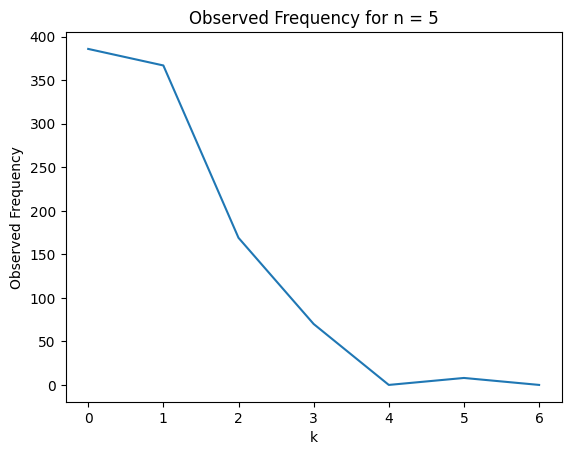

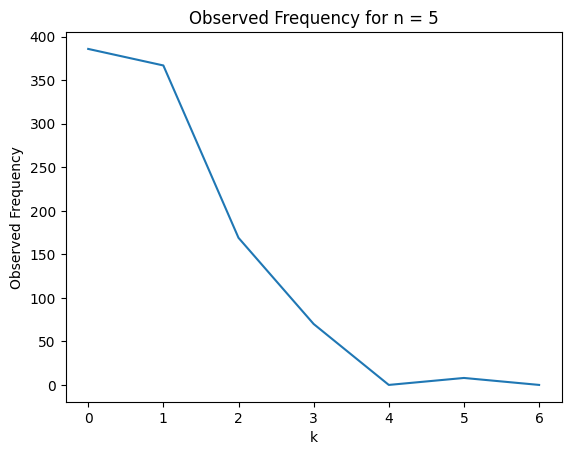

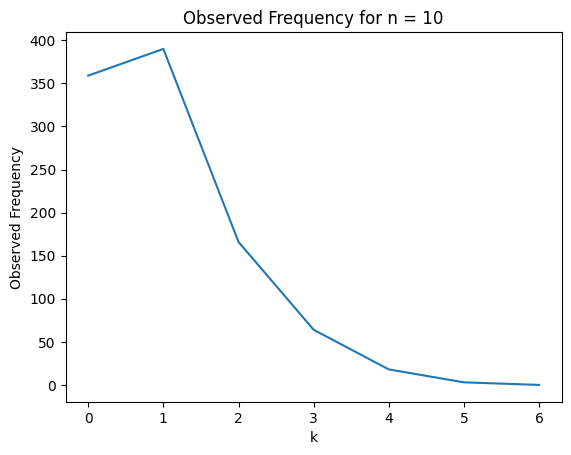

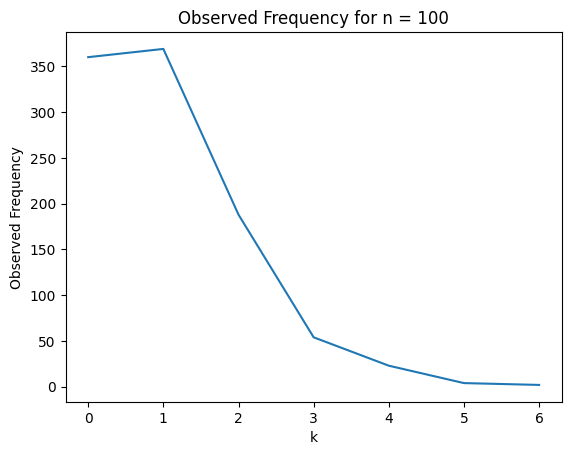

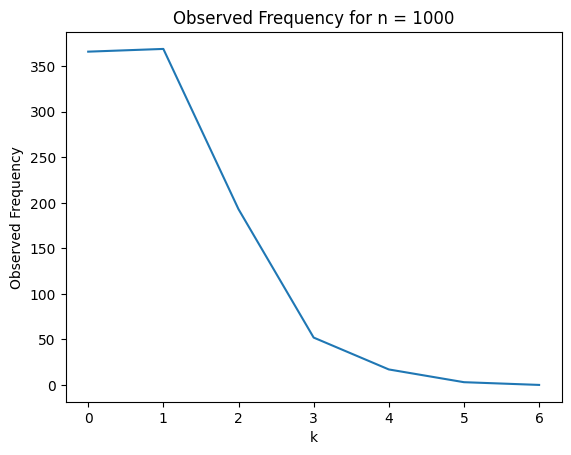

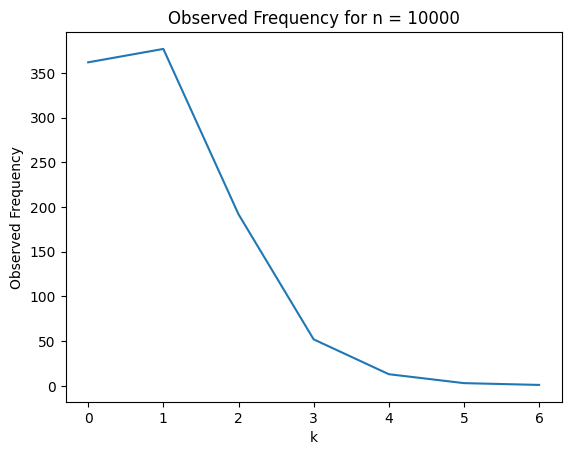

In [20]:
# this is me being silly

import matplotlib.pyplot as plt


# Plotting n = 5
plt.plot(nk_table[5])
plt.title('Observed Frequency for n = 5')
plt.xlabel('k')
plt.ylabel('Observed Frequency')
plt.show()

for n in n_to_consider:
    plt.plot(nk_table[n])
    plt.title(f'Observed Frequency for n = {n}')
    plt.xlabel('k')
    plt.ylabel('Observed Frequency')
    plt.show()



In [21]:
from tabulate import tabulate
from scipy.stats import poisson

def probForFreq(freq, n):
    return freq/n

def poiss(k, lambda_val=1):
    return poisson.pmf(k, lambda_val)

num_trials = 1000

# Define the table data
table_data = [
    ["K = 0", probForFreq(nk_table[5][0], num_trials), probForFreq(nk_table[10][0], num_trials), probForFreq(nk_table[100][0], num_trials), probForFreq(nk_table[1000][0], num_trials), probForFreq(nk_table[10000][0], num_trials), poiss(0)],
    ["K = 1", probForFreq(nk_table[5][1], num_trials), probForFreq(nk_table[10][1], num_trials), probForFreq(nk_table[100][1], num_trials), probForFreq(nk_table[1000][1], num_trials), probForFreq(nk_table[10000][1], num_trials), poiss(1)],
    ["K = 2", probForFreq(nk_table[5][2], num_trials), probForFreq(nk_table[10][2], num_trials), probForFreq(nk_table[100][2], num_trials), probForFreq(nk_table[1000][2], num_trials), probForFreq(nk_table[10000][2], num_trials), poiss(2)],
    ["K = 3", probForFreq(nk_table[5][3], num_trials), probForFreq(nk_table[10][3], num_trials), probForFreq(nk_table[100][3], num_trials), probForFreq(nk_table[1000][3], num_trials), probForFreq(nk_table[10000][3], num_trials), poiss(3)],
    ["K = 4", probForFreq(nk_table[5][4], num_trials), probForFreq(nk_table[10][4], num_trials), probForFreq(nk_table[100][4], num_trials), probForFreq(nk_table[1000][4], num_trials), probForFreq(nk_table[10000][4], num_trials), poiss(4)],
    ["K = 5", probForFreq(nk_table[5][5], num_trials), probForFreq(nk_table[10][5], num_trials), probForFreq(nk_table[100][5], num_trials), probForFreq(nk_table[1000][5], num_trials), probForFreq(nk_table[10000][5], num_trials), poiss(5)],
    ["K = 6", probForFreq(nk_table[5][6], num_trials), probForFreq(nk_table[10][6], num_trials), probForFreq(nk_table[100][6], num_trials), probForFreq(nk_table[1000][6], num_trials), probForFreq(nk_table[10000][6], num_trials), poiss(6)]
]

# Define the table headers
headers = ["k value", "n = 5", "n = 10", "n = 100", "n = 1000", "n = 10000", "Poisson"]

# Print the table
print(tabulate(table_data, headers=headers))

k value      n = 5    n = 10    n = 100    n = 1000    n = 10000      Poisson
---------  -------  --------  ---------  ----------  -----------  -----------
K = 0        0.386     0.359      0.36        0.366        0.362  0.367879
K = 1        0.367     0.39       0.369       0.369        0.377  0.367879
K = 2        0.169     0.166      0.188       0.193        0.192  0.18394
K = 3        0.07      0.064      0.054       0.052        0.052  0.0613132
K = 4        0         0.018      0.023       0.017        0.013  0.0153283
K = 5        0.008     0.003      0.004       0.003        0.003  0.00306566
K = 6        0         0          0.002       0            0.001  0.000510944


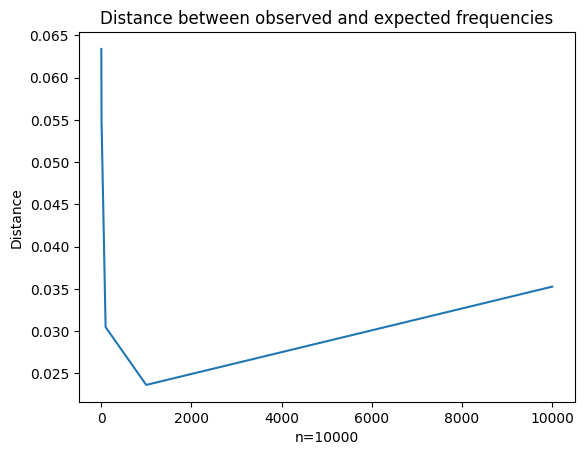

In [22]:
def distance(observed, expected):
    return np.sum(np.abs(observed - expected))

error = {}

for n in n_to_consider:
    currentError = 0    
    for k in range(7):
        currentError += (distance(probForFreq(nk_table[n][k],num_trials), poiss(k)))
        # print(distance(probForFreq(nk_table[n][k],num_trials), poiss(k)))
    error[n] = currentError

plt.plot([5,10,100,1000,10000], [error[5],error[10],error[100],error[1000],error[10000]])
plt.title('Distance between observed and expected frequencies')
plt.xlabel('n=' + str(n))
plt.ylabel('Distance')
plt.show()

 
